# ***SVM (Support Vector Machine), KNN (K-Nearest Neighbor), Naive Bayes, Random Forest, Decision Tree, Neural Network*** menggunakan TF-IDF

In [9]:
import pandas as pd

file_path = 'label_manual.csv'
data = pd.read_csv(file_path, sep=';')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   normalisasi  248 non-null    object
 1   label        248 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


,normalisasi,label
0,luar biasa,positive
1,aplikasi nya bagus bisa serba guna tapi buat u...,neutral
2,good,positive
3,sangat membantu,positive
4,karena tidak sesuai dengan gambar,negative


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

cleaned_data = data.dropna(subset=['normalisasi'])

X = cleaned_data['normalisasi']
y = cleaned_data['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))
print('===========================')

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, X_test_vec.shape

Jumlah data latih: 198
Jumlah data uji: 50


((198, 756), (50, 756))

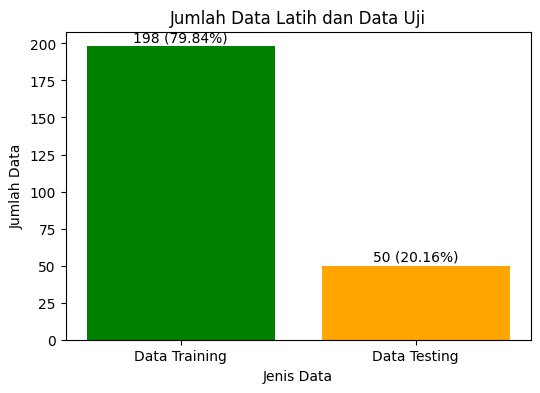

In [12]:
import matplotlib.pyplot as plt


train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['green', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()


In [13]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Decision Trees": DecisionTreeClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, hidden_layer_sizes=(100,), max_iter=500),
}

# Train models
results = {}
for model_name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    results[model_name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }


Confusion Matrix for SVM:


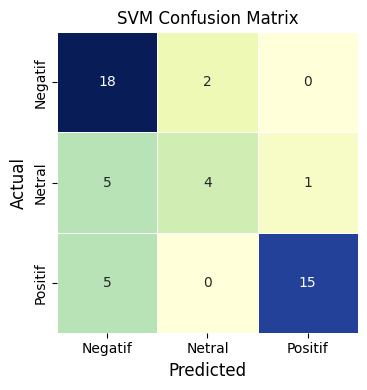


Confusion Matrix for KNN:


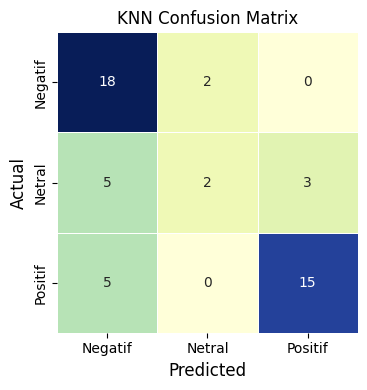


Confusion Matrix for Naive Bayes:


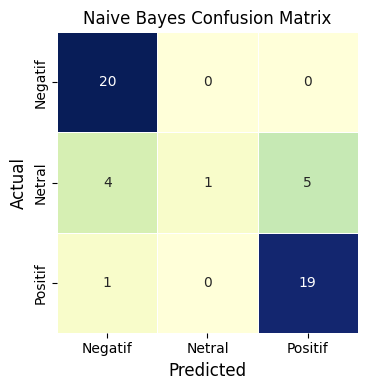


Confusion Matrix for Random Forest:


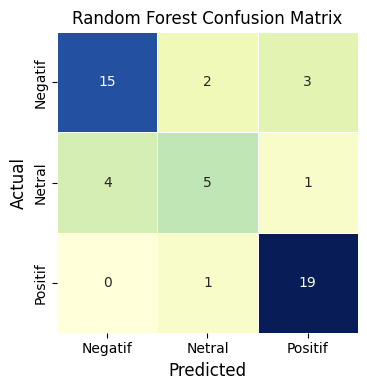


Confusion Matrix for Decision Trees:


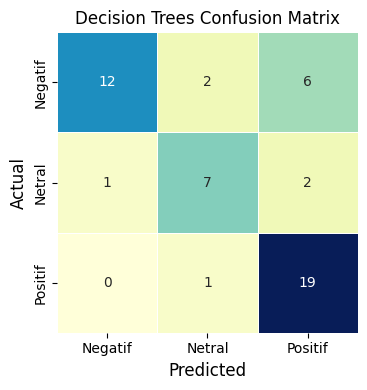


Confusion Matrix for Neural Network:


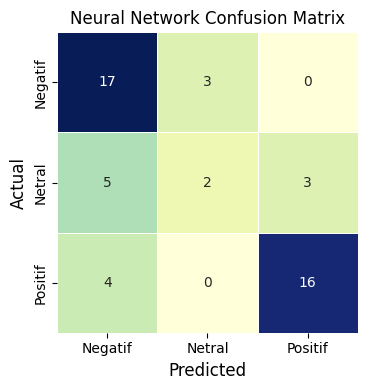

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, result in results.items():
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(
        result["confusion_matrix"],
        annot=True,
        fmt='d',
        cmap="YlGnBu",
        cbar=False,
        xticklabels=['Negatif', 'Netral', 'Positif'],
        yticklabels=['Negatif', 'Netral', 'Positif'],
        ax=ax,
        square=True,
        linewidths=0.5
    )
    print(f"\nConfusion Matrix for {model_name}:")
    ax.set_title(f"{model_name} Confusion Matrix", fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)


    plt.tight_layout()
    plt.show()


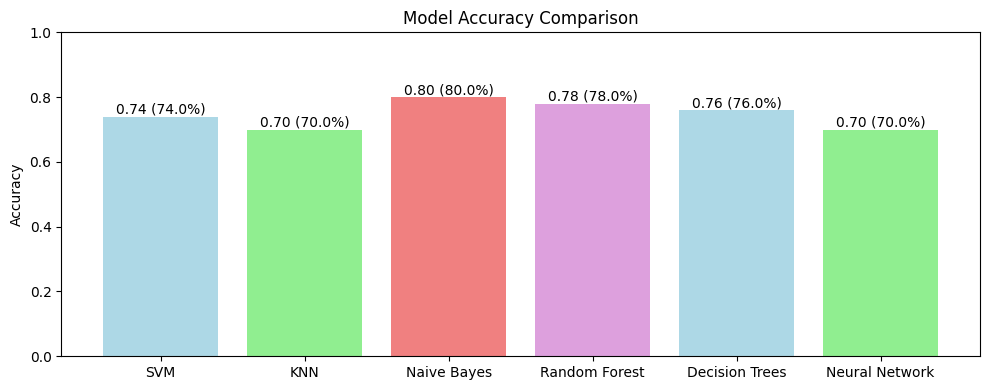

In [15]:
import matplotlib.pyplot as plt

accuracies = {model: result['accuracy'] for model, result in results.items()}

plt.figure(figsize=(10, 4))
bars = plt.bar(list(accuracies.keys()), list(accuracies.values()), color=['lightblue', 'lightgreen', 'lightcoral', 'plum'])

for bar in bars:
    accuracy = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        accuracy,
        f'{accuracy:.2f} ({accuracy * 100:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [16]:
from IPython.display import display

for model_name, result in results.items():
    print(f"\nClassification Report for {model_name}:")

    report_df = pd.DataFrame(result['classification_report']).transpose()

    styled_df = report_df.style.background_gradient(cmap="coolwarm")
    styled_df = styled_df.format(precision=3)
    display(styled_df)


Classification Report for SVM:


,precision,recall,f1-score,support
negative,0.643,0.900,0.750,20.000
neutral,0.667,0.400,0.500,10.000
positive,0.938,0.750,0.833,20.000
accuracy,0.740,0.740,0.740,0.740
macro avg,0.749,0.683,0.694,50.000
weighted avg,0.765,0.740,0.733,50.000



Classification Report for KNN:


,precision,recall,f1-score,support
negative,0.643,0.900,0.750,20.000
neutral,0.500,0.200,0.286,10.000
positive,0.833,0.750,0.789,20.000
accuracy,0.700,0.700,0.700,0.700
macro avg,0.659,0.617,0.608,50.000
weighted avg,0.690,0.700,0.673,50.000



Classification Report for Naive Bayes:


,precision,recall,f1-score,support
negative,0.800,1.000,0.889,20.000
neutral,1.000,0.100,0.182,10.000
positive,0.792,0.950,0.864,20.000
accuracy,0.800,0.800,0.800,0.800
macro avg,0.864,0.683,0.645,50.000
weighted avg,0.837,0.800,0.737,50.000



Classification Report for Random Forest:


,precision,recall,f1-score,support
negative,0.789,0.750,0.769,20.000
neutral,0.625,0.500,0.556,10.000
positive,0.826,0.950,0.884,20.000
accuracy,0.780,0.780,0.780,0.780
macro avg,0.747,0.733,0.736,50.000
weighted avg,0.771,0.780,0.772,50.000



Classification Report for Decision Trees:


,precision,recall,f1-score,support
negative,0.923,0.600,0.727,20.000
neutral,0.700,0.700,0.700,10.000
positive,0.704,0.950,0.809,20.000
accuracy,0.760,0.760,0.760,0.760
macro avg,0.776,0.750,0.745,50.000
weighted avg,0.791,0.760,0.754,50.000



Classification Report for Neural Network:


,precision,recall,f1-score,support
negative,0.654,0.850,0.739,20.000
neutral,0.400,0.200,0.267,10.000
positive,0.842,0.800,0.821,20.000
accuracy,0.700,0.700,0.700,0.700
macro avg,0.632,0.617,0.609,50.000
weighted avg,0.678,0.700,0.677,50.000
